In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

 # import os
 # for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
 #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# importing our modules

In [65]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
from IPython.display import Audio 
import warnings 
warnings.filterwarnings ('ignore')

# loading our dataset

In [66]:
paths = [] 
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
            paths.append(os.path.join(dirname, filename)) 
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
print('our dataset is loaded')

our dataset is loaded


In [67]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [68]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [69]:
#create a dataframe 
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [70]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

# DATA ANALYSIS


<Axes: xlabel='label', ylabel='count'>

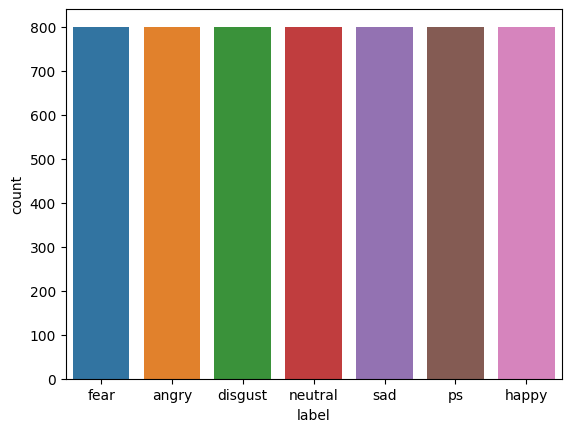

In [71]:
sns.countplot(x='label',data=df)

In [72]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    

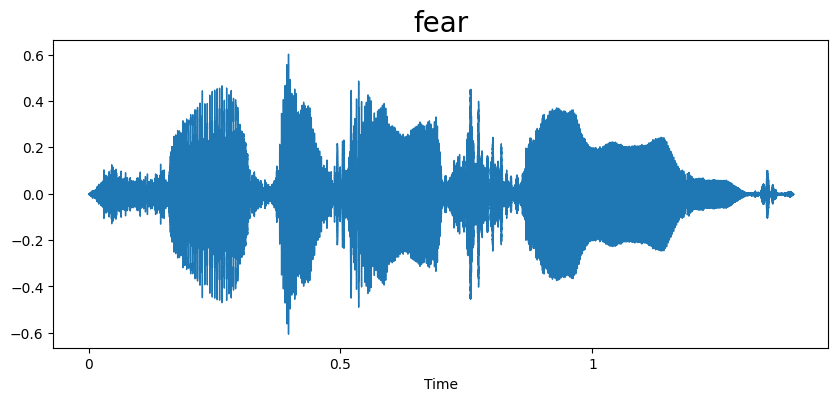

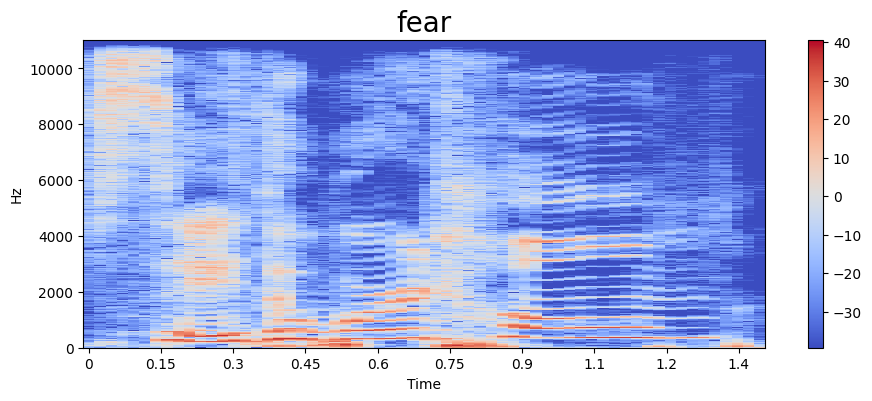

In [73]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

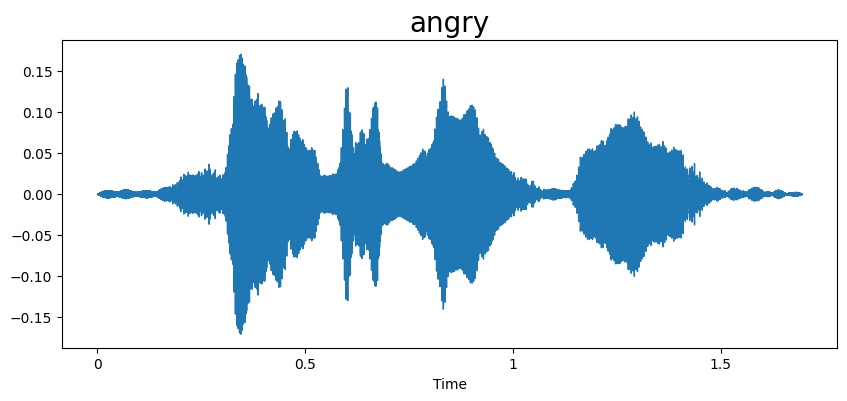

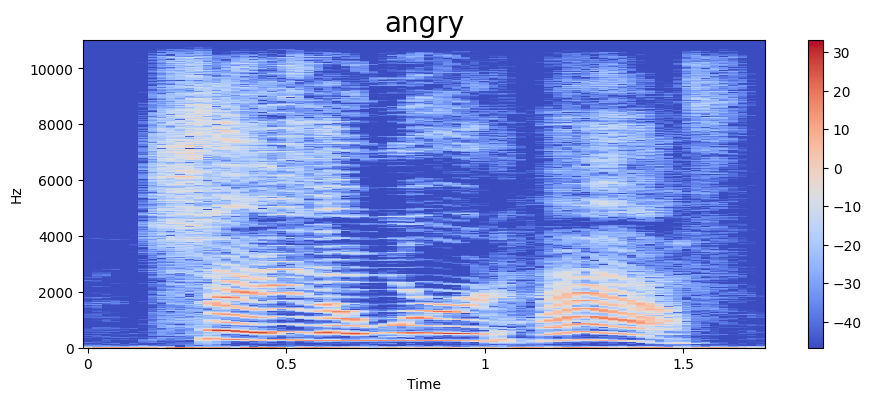

In [74]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

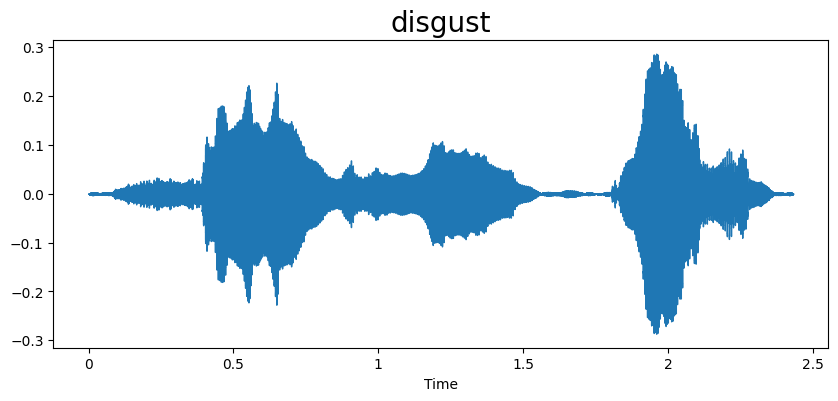

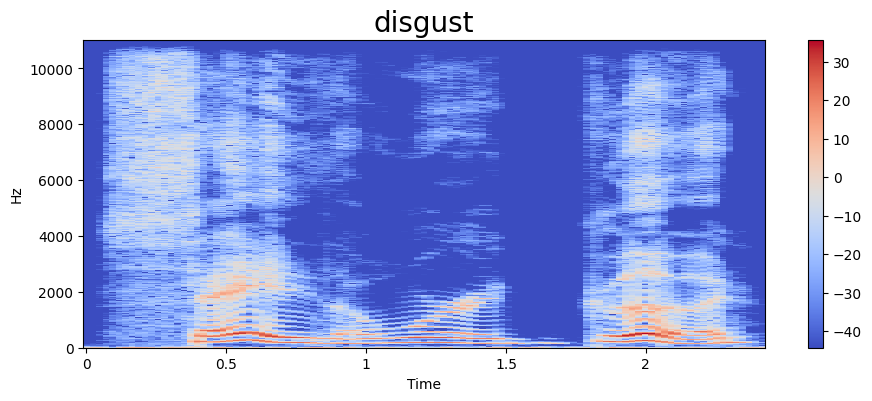

In [75]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

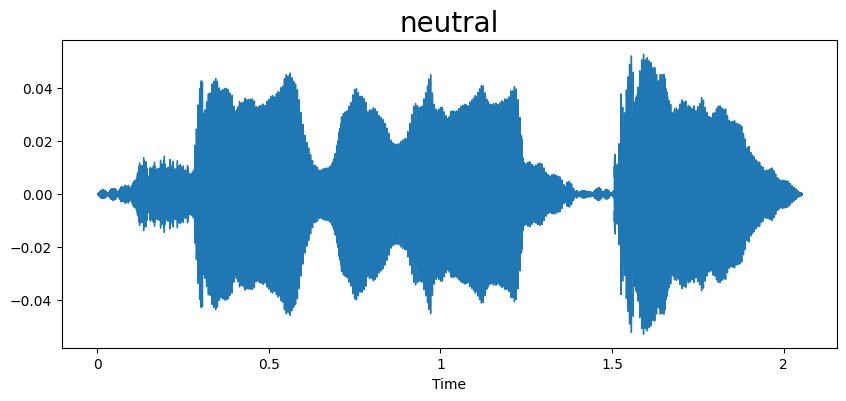

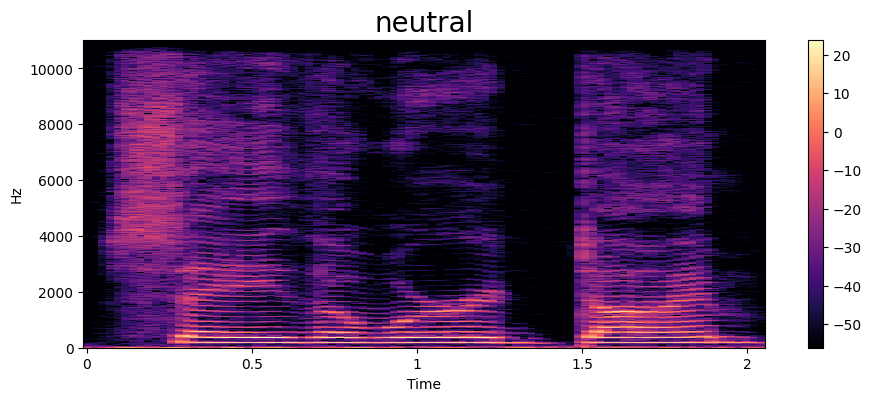

In [76]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

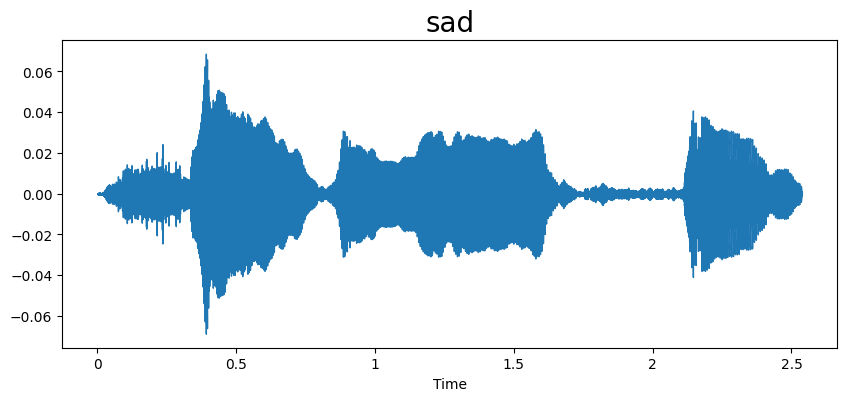

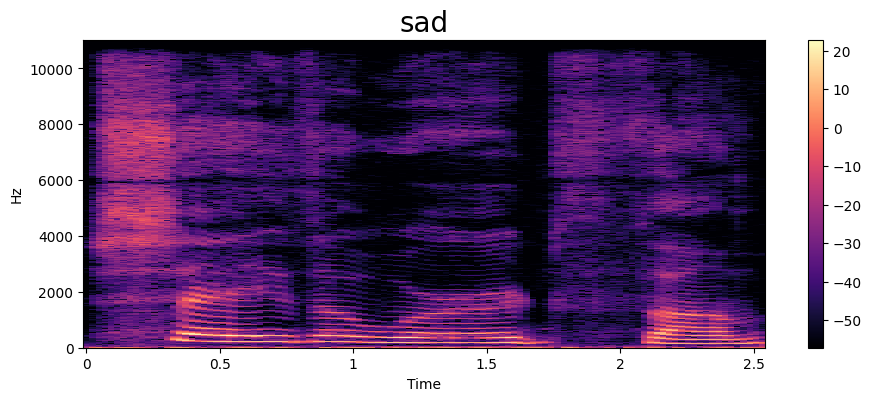

In [77]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

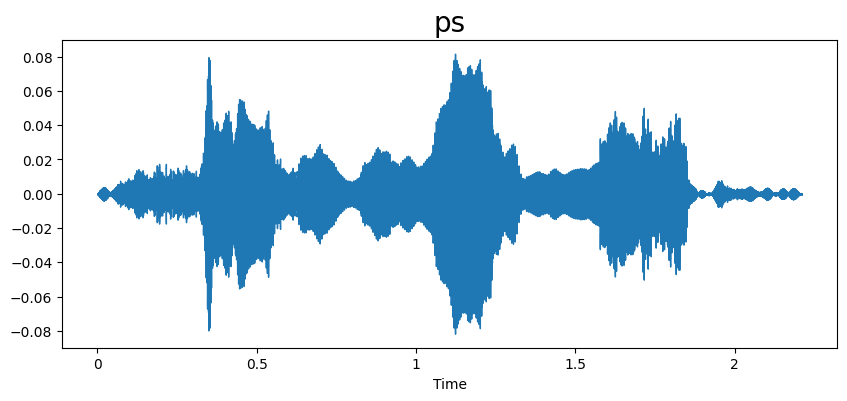

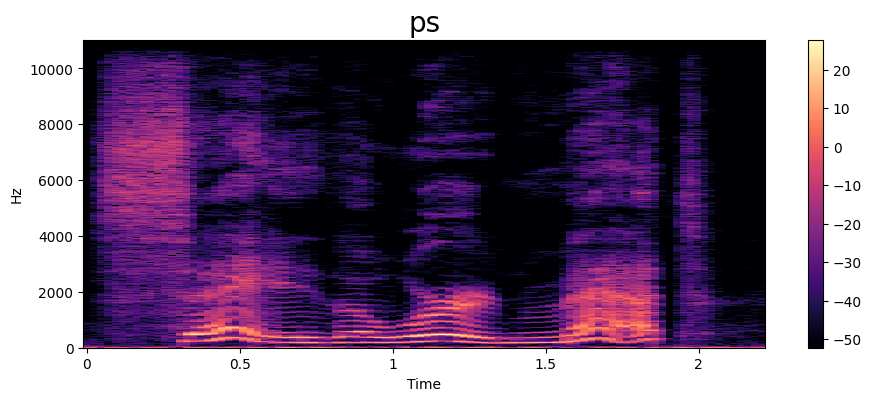

In [78]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

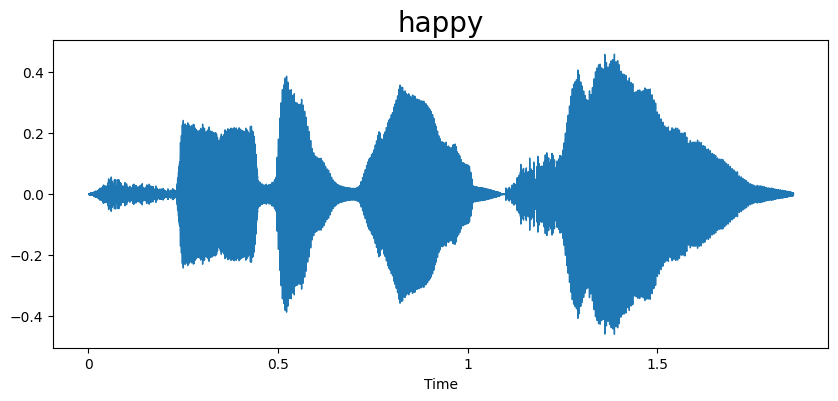

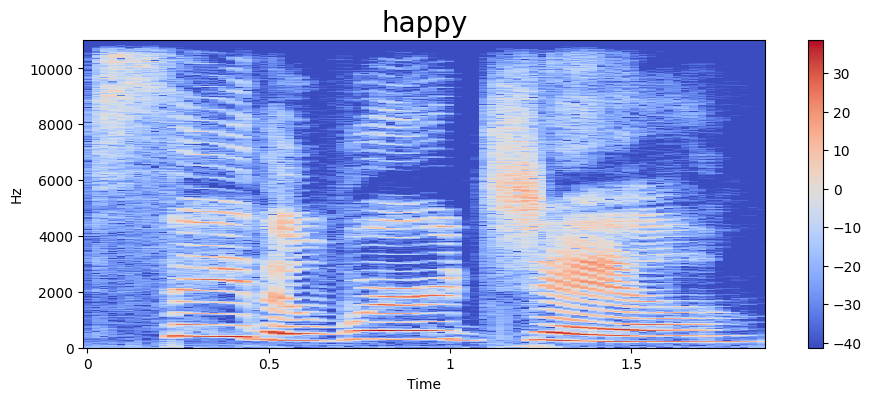

In [79]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate, emotion)
Audio(path)

# Extracting the features

In [80]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [81]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689112 ,   22.125532  ,
        -14.757395  ,   11.051346  ,   12.412449  ,   -3.0002618 ,
          1.0844991 ,   11.078272  ,  -17.41966   ,   -8.093213  ,
          6.5879726 ,   -4.2209535 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325035  ,   -3.8427293 ,    0.89629656,
        -11.239262  ,    6.653462  ,   -2.5883696 ,   -7.7140164 ,
        -10.941658  ,   -2.4007547 ,   -5.281288  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.869744  ,
         -1.6027985 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [82]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [83]:
X_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: speech, Length: 5600, dtype: object

In [84]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [85]:
#input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [86]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [87]:
y = y.toarray()

In [88]:
y.shape

(5600, 7)

# creating our lstm model

In [89]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0,2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [90]:
#train model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, shuffle=True)

Epoch 1/50
70/70 [==============================] - 5s 45ms/step - loss: 1.0259 - accuracy: 0.6413 - val_loss: 0.8371 - val_accuracy: 0.6821
Epoch 2/50
70/70 [==============================] - 3s 40ms/step - loss: 0.3228 - accuracy: 0.8987 - val_loss: 0.4877 - val_accuracy: 0.8527
Epoch 3/50
70/70 [==============================] - 3s 39ms/step - loss: 0.1926 - accuracy: 0.9429 - val_loss: 0.2018 - val_accuracy: 0.9286
Epoch 4/50
70/70 [==============================] - 3s 38ms/step - loss: 0.1357 - accuracy: 0.9547 - val_loss: 0.1324 - val_accuracy: 0.9563
Epoch 5/50
70/70 [==============================] - 3s 39ms/step - loss: 0.0939 - accuracy: 0.9723 - val_loss: 0.2212 - val_accuracy: 0.9304
Epoch 6/50
70/70 [==============================] - 3s 39ms/step - loss: 0.1157 - accuracy: 0.9654 - val_loss: 0.1098 - val_accuracy: 0.9625
Epoch 7/50
70/70 [==============================] - 3s 39ms/step - loss: 0.0684 - accuracy: 0.9810 - val_loss: 0.0534 - val_accuracy: 0.9821
Epoch 8/50
70

# results plottting

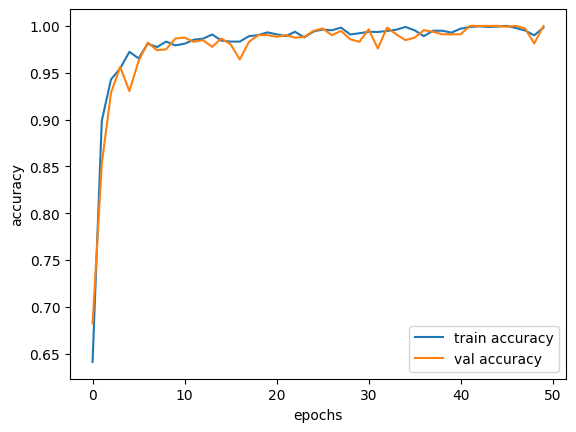

In [91]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


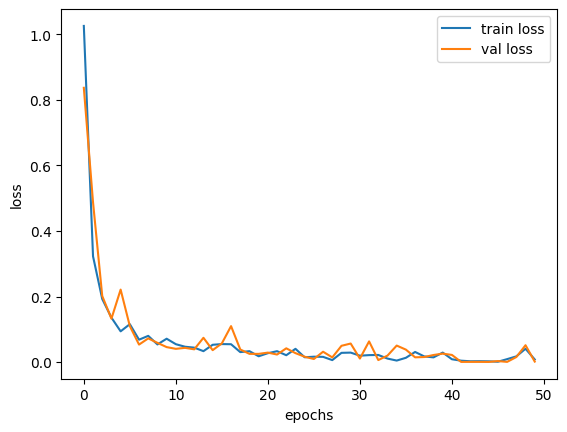

In [92]:
epochs = list(range(50))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
